### <center>Exploratory Data Analysis for Credit Card Data</center> 

Analytics is revolutionizing the credit card industry by leveraging data to grasp customer behavior, create personalized offerings, and spot trends to attract new clients. It also plays a vital role in preventing fraud and minimizing chargebacks by swiftly flagging suspicious transactions. In essence, data-driven insights are now a linchpin for elevating customer engagement, security, and operational efficiency in the credit card sector.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime,timedelta
%matplotlib inline

### Requirement Gathering:Requirements shared by Analytixlabs

To excel in the modern credit card industry, making informed decisions is crucial. This requires digging deep into data through effective analysis and modeling. PSPD Bank, a global player with operations in over 50 countries, is no exception. Their CEO, Mr. Jim Watson, is focused on evaluating key areas like bankruptcy, fraud prevention, and collections management, all while improving customer service with proactive offers. In essence, the challenge lies in using data-driven insights to enhance decision-making and customer satisfaction in a complex global landscape.

### Data Availability

<b>Customer Acquisition</b>: At the time of card issuing, company maintains the details of customers.

<b>Spend (Transaction data)</b>: Credit card spend for each customer

<b>Repayment</b>: Credit card Payment done by customer

In [2]:
customer=pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Python\Python Foundation Case Study 2 - Credit Card\Case study 2 - Credit Card\Customer Acqusition.csv")

In [3]:
spend=pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Python\Python Foundation Case Study 2 - Credit Card\Case study 2 - Credit Card\spend.csv")

In [4]:
repayment=pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Python\Python Foundation Case Study 2 - Credit Card\Case study 2 - Credit Card\Repayment.csv")

#### EXPLORATORY DATA ANALYSIS | DATA PROFILING | DATA INSPECTION

In [5]:
customer.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [6]:
spend.head(5)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [7]:
repayment.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [8]:
#Checking number of columns, rows and datatype, null values if any in data set

In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [10]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [11]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [12]:
customer.nunique()

No          100
Customer    100
Age          55
City          8
Product       3
Limit         8
Company      41
Segment       5
dtype: int64

In [13]:
spend.nunique()

Sl No:      1500
Customer     100
Month         74
Type          15
Amount      1500
dtype: int64

In [14]:
repayment.nunique()

SL No:        1499
Customer       100
Month           74
Amount        1500
Unnamed: 4       0
dtype: int64

#### DATA PREP | DATA CLEANING | DATA MUNGING | DATA WRANGLING

In [15]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [16]:
#Changing columns
customer.drop('No', axis=1, inplace=True)

In [17]:
customer.head(5)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [18]:
# Checking for null value if any
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [19]:
# Checking for na values if any
customer.isna().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [20]:
# Transaction info

spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [21]:
spend.drop('Sl No:', axis=1, inplace=True)

In [22]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Type      1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), object(3)
memory usage: 47.0+ KB


In [23]:
spend.isna().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [24]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [25]:
spend['Month']=pd.to_datetime(spend.Month)

In [26]:
spend.rename(columns={'Month':'Spend_Month'}, inplace=True)

In [27]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer     1500 non-null   object        
 1   Spend_Month  1500 non-null   datetime64[ns]
 2   Type         1500 non-null   object        
 3   Amount       1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


In [28]:
spend.head(5)

,Customer,Spend_Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [29]:
#Repayment Dataset

repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [30]:
repayment.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [31]:
repayment.drop(['Unnamed: 4', 'SL No:'],axis=1,  inplace=True)

In [32]:
repayment.head(5)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [33]:
repayment.isna().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [34]:
repayment['Month']=pd.to_datetime(repayment.Month)

In [35]:
repayment.rename(columns={'Month':'Repayment_Month'}, inplace=True)

In [36]:
repayment.dropna(axis=0, inplace=True)

In [37]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer         1500 non-null   object        
 1   Repayment_Month  1500 non-null   datetime64[ns]
 2   Amount           1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


##### a. In case age is less than 18, replace it with mean of age values.

In [38]:
customer['Age']=np.where(customer['Age']<18,customer.Age.mean(), customer.Age ).astype('int64')

In [39]:
customer.Age

0     76
1     71
2     34
3     47
4     56
      ..
95    54
96    58
97    51
98    35
99    36
Name: Age, Length: 100, dtype: int64

##### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [40]:
customer_spend=pd.merge(left=customer, right=spend, on='Customer')

In [41]:
customer_spend.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [42]:
customer_spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer     1500 non-null   object        
 1   Age          1500 non-null   int64         
 2   City         1500 non-null   object        
 3   Product      1500 non-null   object        
 4   Limit        1500 non-null   float64       
 5   Company      1500 non-null   object        
 6   Segment      1500 non-null   object        
 7   Spend_Month  1500 non-null   datetime64[ns]
 8   Type         1500 non-null   object        
 9   Amount       1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 128.9+ KB


In [43]:
customer_spend['Amount']=np.where(customer_spend.Amount>customer_spend.Limit, customer_spend.Limit*0.5, customer_spend.Amount)

In [44]:
customer[customer_spend['Amount']>customer_spend['Limit']]

C:\Users\vijay\AppData\Local\Temp\ipykernel_14564\648779280.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer_spend['Amount']>customer_spend['Limit']]


,Customer,Age,City,Product,Limit,Company,Segment


In [45]:
customer_spend.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


##### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [46]:
customer_repayment=pd.merge(left=customer, right=repayment, on='Customer')

In [47]:
customer_repayment.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Repayment_Month,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [48]:
customer_repayment['Amount']=np.where(customer_repayment.Amount>customer_repayment.Limit, customer_repayment.Limit, customer_repayment.Amount)

In [49]:
customer_repayment.Amount>customer_repayment.Limit

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [50]:
customer_repayment.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Repayment_Month,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


#### 2. From the above dataset create the following summaries:

 ##### a. How many distinct customers exist?

In [51]:
spend_cust=pd.DataFrame(customer_spend.Customer)
spend_cust

,Customer
0,A1
1,A1
2,A1
3,A1
4,A1
...,...
1495,A96
1496,A97
1497,A98
1498,A99


In [52]:
repayment_cust=pd.DataFrame(customer_repayment.Customer)

In [53]:
unique_customers=pd.concat([spend_cust, repayment_cust])
unique_customers=unique_customers.nunique()[0]
unique_customers

100

##### b. How many distinct categories exist?

In [54]:
spend_categories=customer_spend['Product']
repayment_categories=customer_repayment['Product']

In [55]:
distinct_categories=pd.concat([spend_categories, repayment_categories]).nunique()

In [56]:
distinct_categories

3

##### c. What is the average monthly spend by customers?

In [57]:
cust_avg_spend=customer_spend.groupby(['Customer', 'Spend_Month']).Amount.mean().reset_index()

In [58]:
cust_avg_spend['Spend_Month']=cust_avg_spend['Spend_Month'].apply(lambda x: x.month)

In [59]:
cust_avg_spend=cust_avg_spend.groupby(['Customer', 'Spend_Month']).Amount.mean().reset_index()

In [60]:
cust_avg_spend.head(30)

,Customer,Spend_Month,Amount
0,A1,1,341332.877000
1,A1,2,138421.151250
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
5,A1,10,244534.680000
6,A1,11,183839.610000
7,A10,1,173828.282500
8,A10,2,170265.770000
9,A10,3,134631.266667


##### d. What is the average monthly repayment by customers?

In [61]:
cust_avg_repayment_amount=customer_repayment.groupby(['Customer', 'Repayment_Month']).Amount.mean().reset_index()

In [62]:
cust_avg_repayment_amount['Repayment_Month']=cust_avg_repayment_amount.Repayment_Month.apply(lambda x:x.month)

In [63]:
cust_avg_repayment_amount=cust_avg_repayment_amount.groupby(['Customer', 'Repayment_Month']).Amount.mean().reset_index()

In [64]:
cust_avg_repayment_amount.head(20)

,Customer,Repayment_Month,Amount
0,A1,1,325723.331000
1,A1,2,137713.785000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
5,A1,11,285729.090000
6,A10,1,283324.721667
7,A10,2,217344.503333
8,A10,3,240130.543333
9,A10,4,120467.322500


##### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
##### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
##### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [65]:
Avg_spend_repayment=pd.merge(left=cust_avg_spend, right=cust_avg_repayment_amount, left_on=['Customer', 'Spend_Month'], right_on=['Customer', 'Repayment_Month'])

In [66]:
Avg_spend_repayment['Monthly_Profit']=Avg_spend_repayment.Amount_y-Avg_spend_repayment.Amount_x

In [67]:
Avg_spend_repayment.head(10)

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit
0,A1,1,341332.877000,1,325723.331000,-15609.546000
1,A1,2,138421.151250,2,137713.785000,-707.366250
2,A1,4,261649.250000,4,254474.580000,-7174.670000
3,A1,11,183839.610000,11,285729.090000,101889.480000
4,A10,1,173828.282500,1,283324.721667,109496.439167
5,A10,2,170265.770000,2,217344.503333,47078.733333
6,A10,3,134631.266667,3,240130.543333,105499.276667
7,A10,4,270721.680000,4,120467.322500,-150254.357500
8,A10,5,189207.392500,5,98672.695000,-90534.697500
9,A10,7,239798.030000,7,358194.650000,118396.620000


In [68]:
Avg_spend_repayment['Profit']=np.where(Avg_spend_repayment['Monthly_Profit']>0, (Avg_spend_repayment['Monthly_Profit']*2.9)/100, np.NaN)

In [69]:
Avg_spend_repayment.head(10)

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.877000,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.151250,2,137713.785000,-707.366250,NaN
2,A1,4,261649.250000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.610000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.282500,1,283324.721667,109496.439167,3175.396736
5,A10,2,170265.770000,2,217344.503333,47078.733333,1365.283267
6,A10,3,134631.266667,3,240130.543333,105499.276667,3059.479023
7,A10,4,270721.680000,4,120467.322500,-150254.357500,NaN
8,A10,5,189207.392500,5,98672.695000,-90534.697500,NaN
9,A10,7,239798.030000,7,358194.650000,118396.620000,3433.501980


##### f. What are the top 5 product types?

In [70]:
top_products=pd.DataFrame(customer_spend.groupby('Type').Amount.sum()).sort_values('Amount', ascending=False).head(5)

In [71]:
top_products

,Amount
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72


##### g. Which city is having maximum spend?

In [72]:
customer_spend.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [73]:
city_most_spend=pd.DataFrame(customer_spend.groupby('City').Amount.sum()).sort_values('Amount', ascending=False).head(5)

In [74]:
city_most_spend

,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65


##### h. Which age group is spending more money?

In [75]:
customer_spend.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [76]:
# need to cread age group

customer_spend['Age_Group']=pd.cut(customer_spend['Age'], bins=[18, 30, 60, 75, 100], labels=['18-30','31-60','61-75', '76-100'])

In [77]:
customer_spend.head(50)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Amount,Age_Group
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,76-100
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,76-100
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,76-100
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,76-100
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,76-100
5,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-23,SANDALS,168285.60,76-100
6,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-01,CAR,23370.20,76-100
7,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,TRAIN TICKET,440563.22,76-100
8,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-02-05,BUS TICKET,52208.65,76-100
9,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,76-100


In [78]:
age_group_spend=customer_spend.groupby('Age_Group').Amount.sum().reset_index().sort_values(by='Amount', ascending=False)

In [79]:
age_group_spend

,Age_Group,Amount
1,31-60,1.240806e+08
0,18-30,5.268990e+07
2,61-75,2.328712e+07
3,76-100,1.972350e+07


In [80]:
age_group_maxspend=pd.DataFrame(age_group_spend.iloc[0].reset_index(drop=True)).T

In [81]:
age_group_maxspend.columns=['Age_Group', 'Amount_Spend']
age_group_maxspend

,Age_Group,Amount_Spend
1,31-60,124080561.64


###### i. Who are the top 10 customers in terms of repayment?

In [82]:
customer_repayment.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Repayment_Month,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06


In [83]:
top_cust_repay=customer_repayment.groupby('Customer').Amount.sum().reset_index().sort_values(by='Amount', ascending=False)

In [84]:
top_cust_repay=top_cust_repay.iloc[0:9, ]

In [85]:
top_cust_repay

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30


#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [86]:
customer_spend.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Amount,Age_Group
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,76-100
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,76-100
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,76-100


In [87]:
customer_spend['Year']=customer_spend['Spend_Month'].apply(lambda x:x.year)

In [88]:
city_prod_spend_visual=pd.crosstab(index=customer_spend.City, columns=[customer_spend.Product,customer_spend.Year] , values=customer_spend.Amount, aggfunc='sum')

In [89]:
city_prod_spend_visual

Product           Gold                              Platimum              \
Year              2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
Year              2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

<Axes: xlabel='City'>

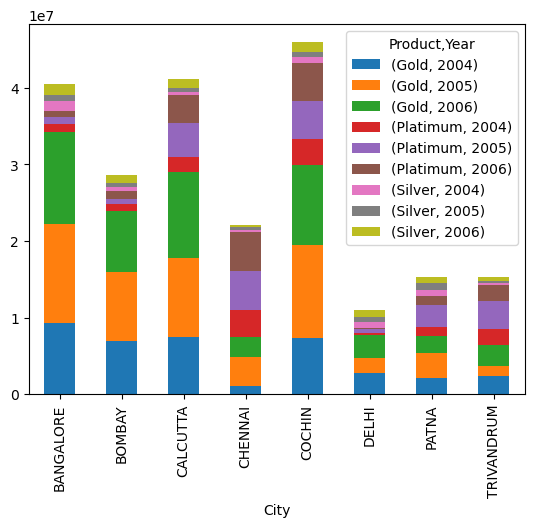

In [90]:
city_prod_spend_visual.plot(kind='bar', stacked=True)

#### 4. Create graphs for

##### a. Monthly comparison of total spends, city wise

In [91]:
customer_spend['Month']=customer_spend['Spend_Month'].apply(lambda x:x.month)

In [92]:
city_month_spend_visual=pd.crosstab(index=customer_spend.City, columns=customer_spend.Month , values=customer_spend.Amount, aggfunc='sum')

In [93]:
city_month_spend_visual

Month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9041796.84,6734494.76,5362903.07,4207980.48,6383115.13,1330685.90,2228217.69,695061.95,703018.28,1091602.61,2260603.07,422167.24
BOMBAY,5948993.33,4276988.30,5227850.50,1873785.01,3891945.60,1172594.97,177726.32,1066744.75,1278402.79,676005.70,2872049.40,140040.71
CALCUTTA,9064864.90,8150545.61,4939040.04,3457507.95,5578246.87,2293045.81,2234573.27,1548354.02,1511713.57,196357.83,2078880.93,55001.50
CHENNAI,4466961.36,4385815.95,3183643.71,2518656.99,2856199.62,1244242.16,693825.77,305875.97,745759.40,156247.17,1347779.28,223628.27
COCHIN,11714373.54,5747886.38,5645146.53,3882744.94,6581085.69,2495745.07,1290897.30,2317306.61,1382242.90,868551.89,3127999.60,909533.05
DELHI,2714261.45,1494064.06,2267149.02,777240.75,1600322.07,511276.09,50001.50,155402.16,50001.00,64615.46,391610.96,842342.02
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704336.99,2857123.89,2392316.51,1199293.45,2813534.48,400336.83,260484.50,453773.94,186063.70,285581.92,143387.40,640922.26


<Axes: xlabel='City'>

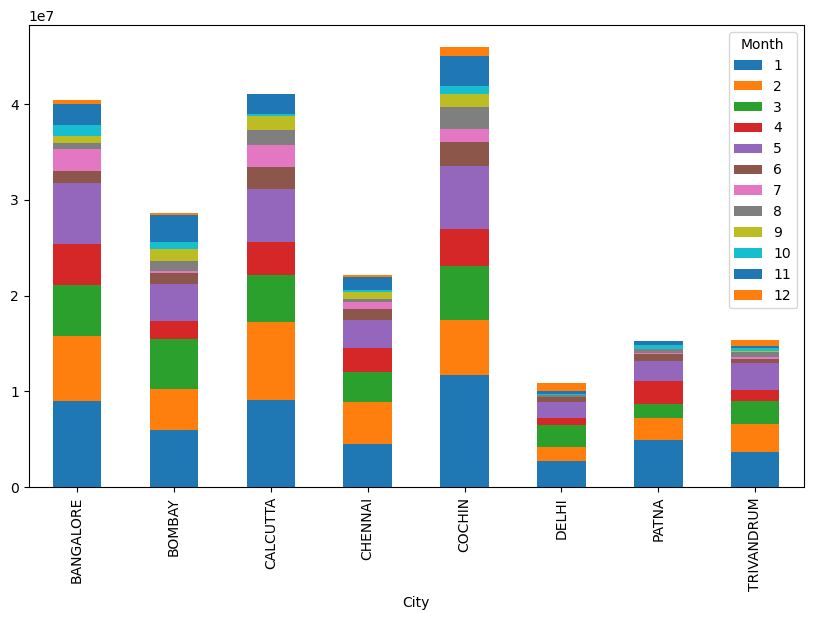

In [94]:
city_month_spend_visual.plot(kind='bar', stacked=True, figsize=(10, 6))

##### b. Comparison of yearly spend on air tickets

In [95]:
air_ticket_spend=pd.crosstab(index=customer_spend.loc[customer_spend.Type=='AIR TICKET', 'Type'], columns=customer_spend.Year , values=customer_spend.Amount, aggfunc='sum')

In [96]:
air_ticket_spend

Year,2004,2005,2006
Type,,,
AIR TICKET,4357225.35,10550152.21,5248469.56


<Axes: xlabel='Type'>

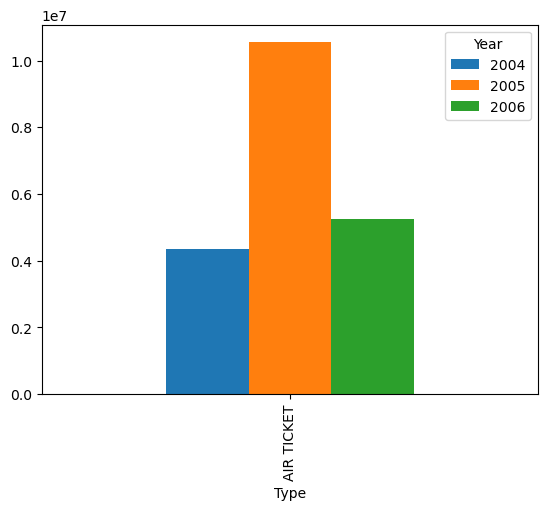

In [97]:
air_ticket_spend.plot(kind='bar')

##### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [98]:
prod_monthly_spend=pd.crosstab(index=customer_spend.Product, columns=customer_spend.Month , values=customer_spend.Amount, aggfunc='sum')

<Axes: xlabel='Product'>

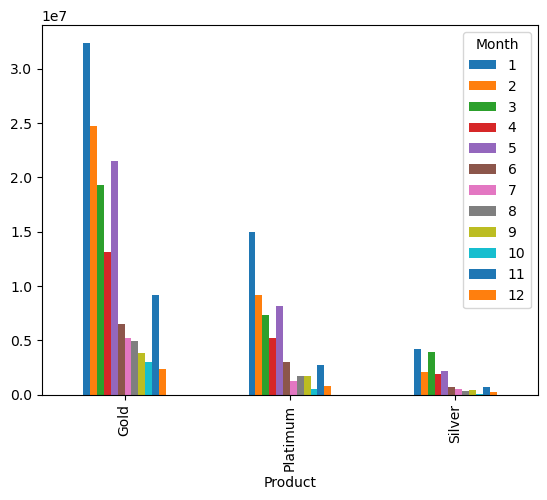

In [99]:
prod_monthly_spend.plot(kind='bar')

In [100]:
def season(x):
    if x==3 or x==4 or x==5:
        
        return 'Spring'
    elif x==6 or x==7 or x==8:
        return 'Summer'
    elif x==9 or x==10 or x==11:
        return 'Autumn'
    else:
        return 'Winter'
    
customer_spend['Season']=customer_spend.Month.apply(season)
    

In [101]:
prod_season_spend=pd.crosstab(index=customer_spend.Product, columns=customer_spend.Season , values=customer_spend.Amount, aggfunc='sum')

<Axes: xlabel='Product'>

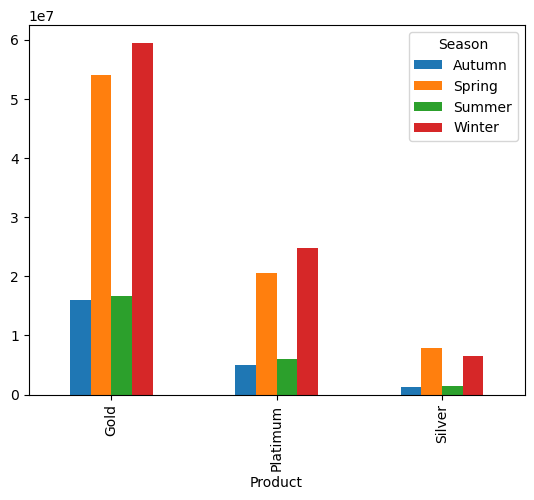

In [102]:
prod_season_spend.plot(kind='bar')

#### 5. Write user defined PYTHON function to perform the following analysis:

You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [103]:
customer_repayment.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Repayment_Month,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [104]:
customer_repayment['Month']=customer_repayment['Repayment_Month'].apply(lambda x: x.month)
customer_repayment['Year']=customer_repayment['Repayment_Month'].apply(lambda x: x.year)

In [105]:
customer_repayment.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Repayment_Month,Amount,Month,Year
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,1,2004


In [106]:
def top_cust(product, time_period):
    return customer_repayment.loc[customer_repayment['Product']==product].groupby(['Customer','City', 'Product', time_period]).Amount.sum().sort_values(ascending=False).reset_index().head(10)

In [113]:
user_product=str(input("Please enter Product Category [Gold/Silver/Platinum]: "))
user_time_period=input("Please enter Time Period  [Month/Year]: ")
top_cust(user_product, user_time_period)

Please enter Product Category [Gold/Silver/Platinum]: Silver
Please enter Time Period  [Month/Year]: Month


,Customer,City,Product,Month,Amount
0,A22,BOMBAY,Silver,1,900000.00
1,A46,PATNA,Silver,1,713614.32
2,A8,PATNA,Silver,1,600012.00
3,A6,DELHI,Silver,1,600000.00
4,A18,BANGALORE,Silver,3,600000.00
5,A7,COCHIN,Silver,1,594009.28
6,A25,COCHIN,Silver,1,586332.08
7,A57,TRIVANDRUM,Silver,3,578549.42
8,A25,COCHIN,Silver,5,572616.74
9,A46,PATNA,Silver,2,544231.79
